# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


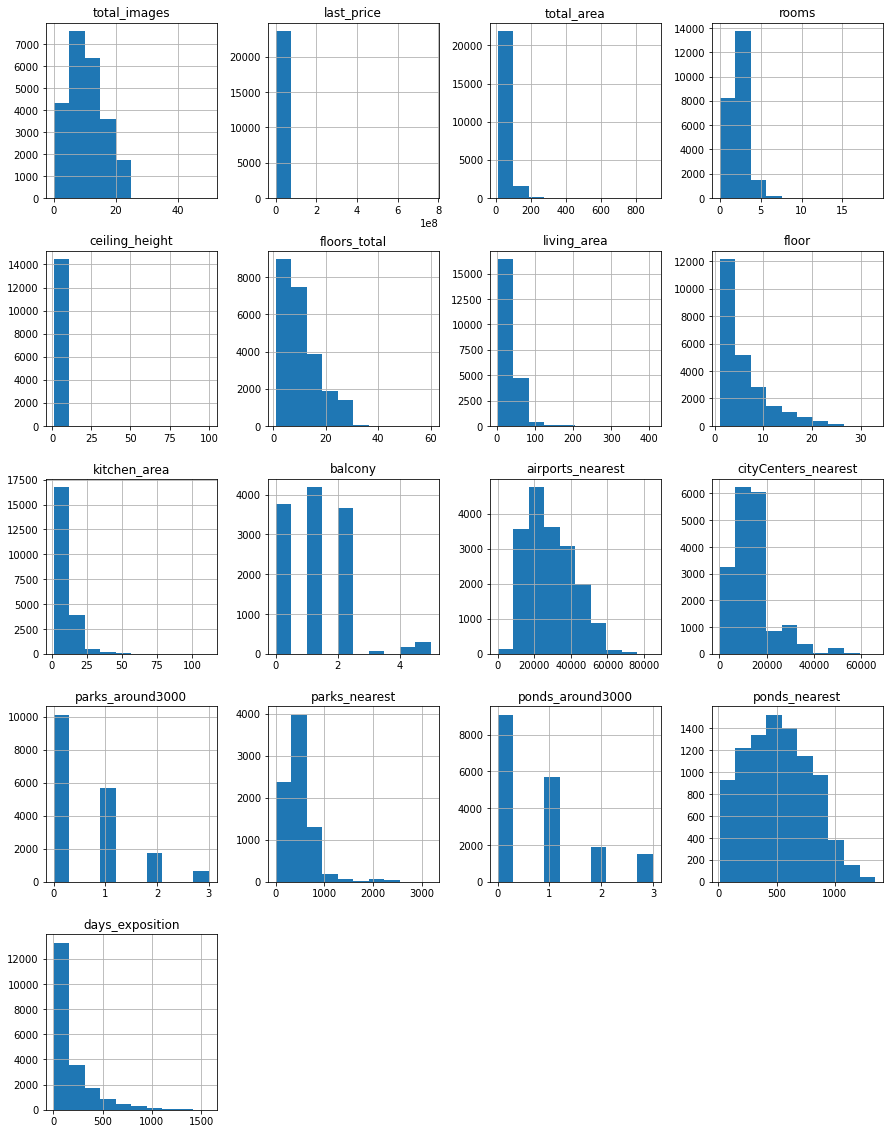

In [2]:
data = pd.read_csv('real_estate_data.csv',sep='\t')
data.hist(figsize=(15,20))
data

### Предобработка данных

Посмотрим, в каких категориях у нас есть пропуски:

In [3]:
print(data.isna().sum().sort_values(ascending = False))

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64


In [4]:
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

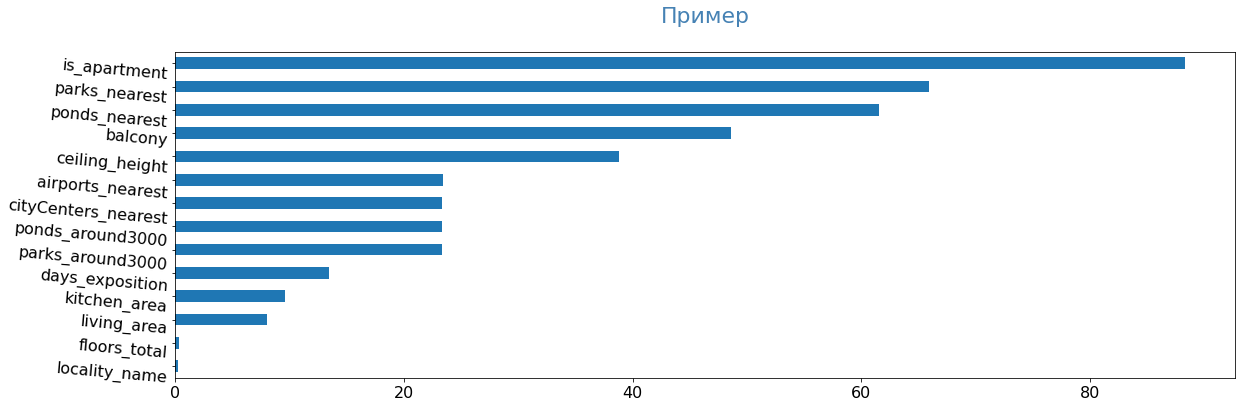

In [5]:
pass_value_barh(data)

У нас есть пропуски в категориях:
- is_apartment            20924 (апартаменты (булев тип))
- parks_nearest           15620 (расстояние до ближайшего парка (м))
- ponds_nearest           14589 (расстояние до ближайшего водоёма (м))
- balcony                 11519 (количество балконов)
- ceiling_height           9195 (высота потолков (м))
- airports_nearest         5542 (расстояние до ближайшего аэропорта в метрах (м))
- cityCenters_nearest      5519 (расстояние до центра города (м))
- ponds_around3000         5518 (число водоёмов в радиусе 3 км)
- parks_around3000         5518 (число парков в радиусе 3 км)
- days_exposition          3181 (сколько дней было размещено объявление (от публикации до снятия))
- kitchen_area             2278 (площадь кухни в квадратных метрах (м²))
- living_area              1903 (жилая площадь в квадратных метрах (м²))
- floors_total               86 (всего этажей в доме)
- locality_name              49 (название населённого пункта)









У нас есть 2 категории параметров:
- те, что заполнял продавец
- те, что подгружались автоматически (картографические)

Пропуски в параметрах, которые загружал продавец:
- ceiling_height           9195 (высота потолков (м))
- floors_total               86 (всего этажей в доме)
- living_area              1903 (жилая площадь в квадратных метрах (м²))
- is_apartment            20924 (апартаменты (булев тип))
- kitchen_area             2278 (площадь кухни в квадратных метрах (м²))
- locality_name              49 (название населённого пункта)
- balcony                 11519 (количество балконов)

Возможные причины, по которым они могли появиться:
- продавец сам не стал их указывать (например, потому что ему это невыгодно и/или просто посчитал, что это не нужно)
- произошла ошибка и данные не подгрузились 

Пропуски в параметрах, которые загружаются автоматически:
- airports_nearest         5542 (расстояние до ближайшего аэропорта в метрах (м))
- cityCenters_nearest      5519 (расстояние до центра города (м))
- parks_around3000         5518 (число парков в радиусе 3 км)
- parks_nearest           15620 (расстояние до ближайшего парка (м))
- ponds_around3000         5518 (число водоёмов в радиусе 3 км)
- ponds_nearest           14589 (расстояние до ближайшего водоёма (м))
- days_exposition          3181 (сколько дней было размещено объявление (от публикации до снятия))

Возможные причины, по которым они могли появиться:
- человек не указал населеный пункт
- в близи нет парков и водоемов, следоветельно, система не может указать ближайшее до них расстояние. Чтобы проверить эту теорию, нуижно понимать, что в понимании системы означается слово "ближайший". Может, она вообще не рассматривает объекты, которые находятся на расстоянии больше какой-то величины. 
- данные не подгрузились 
- в радиусе 3 км нет парков и водоемов

Рассмотрим, каждую категорию пропусков по отдельности.

 Количество балконов: т.к. балконы есть далеко не во всех квартирах, то если человек не указал их количество, то разумней данный пропуск заполнить 0.

In [6]:
data['balcony'] = data['balcony'].fillna(value=0)

Проверим, связан ли пропуск в параметре 'Населеный пункт' c параметрами, которые рассчитываются автоматически. 

In [7]:
print(display(data.loc[(data['locality_name'].isna()), ['locality_name','airports_nearest','cityCenters_nearest','parks_around3000','ponds_nearest']]))

,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,ponds_nearest
1097,NaN,23478.0,4258.0,0.0,NaN
2033,NaN,NaN,NaN,NaN,NaN
2603,NaN,22041.0,17369.0,0.0,374.0
2632,NaN,22041.0,17369.0,0.0,374.0
3574,NaN,27419.0,8127.0,0.0,603.0
4151,NaN,25054.0,3902.0,1.0,722.0
4189,NaN,21774.0,3039.0,1.0,953.0
4670,NaN,26534.0,5382.0,1.0,376.0
5343,NaN,10556.0,9538.0,1.0,NaN
5707,NaN,21460.0,16788.0,0.0,170.0


None


Как мы видим, есть строчки, у которые во всех 5 столбцах значения 'NaN'. Такие строчки не принесут ничего хорошего для анализа нашего датасета, поэтому их лучше удалить. 

In [8]:
data = data.loc[~(
                    (data['locality_name'].isna())&
                    (data['airports_nearest'].isna())&
                    (data['cityCenters_nearest'].isna())&
                    (data['parks_around3000'].isna())&
                    (data['ponds_nearest'].isna())
                )]

In [9]:
# check
data.shape

(23691, 22)

Название населенного пункта играет очень важную роль при продаже квартиры. Поэтому строки, где есть пропуски в данном столбце стоит удалить. Их всего 49, поэтому на наш датасет это никак не повлияет, данных будет достаточно. 

In [10]:
data = data.loc[~(
                    (data['locality_name'].isna())     
                )]

Выведем уникальные значения в столбце названий населенного пункта. И построим сводную таблицу, по Населенным пунктам и картографическим параметрам. 

In [11]:
print((data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [12]:
pivot_table = data.pivot_table(index='locality_name',
                                         values = ['airports_nearest','cityCenters_nearest','parks_around3000','ponds_nearest'], 
                                         aggfunc ='median')
print(display(pivot_table))

,airports_nearest,cityCenters_nearest,parks_around3000,ponds_nearest
locality_name,,,,
Зеленогорск,72282.0,53381.0,3.0,507.0
Колпино,26232.0,32018.0,0.0,509.0
Красное Село,25715.5,29140.5,0.0,225.5
Кронштадт,67850.0,49575.0,2.0,312.0
Ломоносов,48415.5,51677.0,0.0,553.0
Павловск,20529.5,32683.0,2.0,458.0
Петергоф,39231.0,33771.0,1.0,474.0
Пушкин,15766.0,27930.5,1.0,444.0
Санкт-Петербург,26757.5,12244.5,0.0,503.0


None


В сводной таблице количество строк гораздо меньше уникальных значений в столбце 'locality_name'. Посмотрим, значение катографических столбцов для Населенных пунктов, которые не вошли в сводную таблицу. 

In [13]:
data.loc[~(data['locality_name'].isin(pivot_table.index)),['locality_name','airports_nearest','cityCenters_nearest','parks_around3000','ponds_nearest']]

,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,ponds_nearest
5,городской посёлок Янино-1,NaN,NaN,NaN,NaN
8,посёлок Мурино,NaN,NaN,NaN,NaN
12,Сертолово,NaN,NaN,NaN,NaN
22,деревня Кудрово,NaN,NaN,NaN,NaN
30,Коммунар,NaN,NaN,NaN,NaN
...,...,...,...,...,...
23683,посёлок Дзержинского,NaN,NaN,NaN,NaN
23692,Тихвин,NaN,NaN,NaN,NaN
23695,Тосно,NaN,NaN,NaN,NaN
23696,село Рождествено,NaN,NaN,NaN,NaN


Получается, эти населенные пункты не вошли в таблицу, т.к. у них в картографических столбцах - значение NaN. Нужно проверить, пропуски в Населенных пунтках для выборочных квартир и для всех.
Посмотрим, в каких населенных пунктах у нас есть пропуски, и выведем их количество в каждом городе.

In [14]:
data.loc[(data['airports_nearest'].isna())&
         (data['cityCenters_nearest'].isna())&
         (data['parks_around3000'].isna())&
         (data['ponds_nearest'].isna())&
         (data['parks_nearest'].isna())&
         (data['ponds_nearest'].isna())].groupby('locality_name').count().head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
locality_name,,,,,,,,,,,,,,,,,,,,,
Бокситогорск,16,16,16,16,16,2,16,10,16,3,...,16,11,16,0,0,0,0,0,0,14
Волосово,36,36,36,36,36,19,36,35,36,2,...,36,35,36,0,0,0,0,0,0,31
Волхов,111,111,111,111,111,58,111,92,111,7,...,111,97,111,0,0,0,0,0,0,85
Всеволожск,398,398,398,398,398,272,398,371,398,44,...,398,357,398,0,0,0,0,0,0,339
Выборг,237,237,237,237,237,98,237,193,237,32,...,237,201,237,0,0,0,0,0,0,208
Высоцк,4,4,4,4,4,3,4,4,4,2,...,4,4,4,0,0,0,0,0,0,4
Гатчина,307,307,307,307,307,149,307,292,307,44,...,307,294,307,0,0,0,0,0,0,268
Ивангород,28,28,28,28,28,12,28,25,28,4,...,28,26,28,0,0,0,0,0,0,22
Каменногорск,13,13,13,13,13,5,13,11,13,1,...,13,11,13,0,0,0,0,0,0,10


Мы видим, что есть населенные пункты, в которых очень много квартир не имеют автоматических данных. Я думаю, в таком случае данные колонки лучше не заполнять. Скорее всего при загрузке в системе произошел какой-то сбой.

Создадим сводную таблицу и посмотрим по Населенным пунктам, сколько данных имеют пропуски в этих параметрах.

In [15]:
data_automatic_isna = data.loc[(data['airports_nearest'].isna())&
         (data['cityCenters_nearest'].isna())&
         (data['parks_around3000'].isna())&
         (data['ponds_nearest'].isna())&
         (data['parks_nearest'].isna())&
         (data['ponds_nearest'].isna())&
         (data['ponds_around3000'].isna()), ['locality_name', 'rooms']].groupby('locality_name').count()
data_automatic  = data.groupby('locality_name')['rooms'].count()
data_automatic_pivot_table = data_automatic_isna.merge(data_automatic, on = 'locality_name', how = 'inner' )
data_automatic_pivot_table['percent']=(data_automatic_pivot_table['rooms_x']/data_automatic_pivot_table['rooms_y']*100).round(1)
data_automatic_pivot_table.head(20)

,rooms_x,rooms_y,percent
locality_name,,,
Бокситогорск,16,16,100.0
Волосово,36,36,100.0
Волхов,111,111,100.0
Всеволожск,398,398,100.0
Выборг,237,237,100.0
Высоцк,4,4,100.0
Гатчина,307,307,100.0
Ивангород,28,28,100.0
Каменногорск,13,13,100.0


Мы видим, что о многих городах вообще нет картографической информации. Это еще раз доказывает, что эти данные лучше не трогать. 
Заполним пропуски в этих колонках пустой строк

In [16]:
data['airports_nearest'] = data['airports_nearest'].fillna('')
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna('')
data['parks_around3000'] = data['parks_around3000'].fillna('')
data['ponds_nearest'] = data['ponds_nearest'].fillna('')
data['parks_nearest'] = data['parks_nearest'].fillna('')
data['ponds_nearest'] = data['ponds_nearest'].fillna('')
data['ponds_around3000'] = data['ponds_nearest'].fillna('')

Помотрим есть ли зависимость высоты потолков от этажности здания

In [17]:
data.pivot_table(index='floors_total', values='ceiling_height');
data.loc[~(data['ceiling_height'].isna()),['floors_total', 'ceiling_height']].sort_values(by='floors_total').head(20)

,floors_total,ceiling_height
22855,1.0,2.70
8335,1.0,3.00
18900,1.0,2.45
21603,1.0,2.90
17020,1.0,3.00
14836,1.0,3.00
8388,1.0,2.65
23498,1.0,2.30
15543,1.0,2.90
11641,1.0,2.50


Как мы видим, такой зависимости не наблюдается. Следовательно, в данном случае лучше не трогать данные в этом столбце.

Рассмотрим столбец 'is_apartment'.

In [18]:
print((data['is_apartment'].value_counts()))
print(display(data.loc[data['is_apartment'] == True, :'locality_name'].head()))

False    2710
True       50
Name: is_apartment, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3.0,29.4,1,True,False,False,NaN,0.0,Петергоф
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3.0,40.0,3,True,False,False,NaN,2.0,Санкт-Петербург
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,NaN,6.0,58.3,5,True,False,False,20.0,1.0,Санкт-Петербург
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,False,False,NaN,0.0,Санкт-Петербург
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,False,False,NaN,1.0,Всеволожск


None


У нас апартаментов - 50, а не апартаментов - 2710.
Все пропуски заполним  - False, т.к. если бы человек продавал апартаменты, он скорее бы это указал. 

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9160
floors_total              85
living_area             1898
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2269
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

Рассмотрим пропуски в площади кухни. 
Найдем медианные значения площади комнат для разного количества комнат.
И проверим, есть ли у студий площадь кухни. 

In [20]:
print(data.groupby('rooms')['kitchen_area'].median())
print(data.groupby('studio')['kitchen_area'].sum())
print(data['rooms'].value_counts())

rooms
0        NaN
1       9.01
2       8.80
3       9.50
4      11.05
5      15.10
6      19.50
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64
studio
False    225920.26
True          0.00
Name: kitchen_area, dtype: float64
1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64


Если в квартире 0  жилых комнат - это студия, следовательно, кухни там быть не может. Следовательно, пропуски в таких строчках заполним 0.
Также, удалить строчки, где количество комнат у квартиры больше 8. Такие квартиры это что-то редкое, следовательно, такие данные нам только повредят.

In [21]:
data.loc[((data['kitchen_area'].isna())&(data['rooms'] == 0))] = 0
data.isna().sum()
data[['rooms', 'kitchen_area']]

,rooms,kitchen_area
0,3,25.00
1,1,11.00
2,2,8.30
3,3,NaN
4,2,41.00
...,...,...
23694,3,13.83
23695,3,8.50
23696,2,NaN
23697,2,23.30


Какая-то часть пропусков ушла. Теперь посмотрим пропуски в kitchen_area и living_area

In [22]:
print(display(data.loc[(data['kitchen_area'].isna()), ['rooms','kitchen_area','living_area', 'balcony', 'total_area', 'locality_name']].head(10)))

,rooms,kitchen_area,living_area,balcony,total_area,locality_name
3,3,NaN,NaN,0.0,159.0,Санкт-Петербург
30,1,NaN,NaN,0.0,32.8,Коммунар
37,2,NaN,NaN,0.0,45.8,поселок городского типа Красный Бор
44,1,NaN,NaN,1.0,40.0,Санкт-Петербург
59,1,NaN,NaN,0.0,46.5,Санкт-Петербург
60,1,NaN,NaN,0.0,35.0,посёлок Мурино
81,1,NaN,NaN,0.0,68.0,Санкт-Петербург
82,3,NaN,NaN,0.0,80.5,посёлок Шушары
133,1,NaN,NaN,0.0,31.0,посёлок Мурино
155,4,NaN,183.0,1.0,317.0,Санкт-Петербург


None





**Видим, что часто пропуски идут в 2 столбцах 'kitchen_area' и 'living_area' одновременно.**

Нужно разобраться с нашими параметрами. 

- total_area - общая площадь, это площадь квартиры. Комнат, кухни, санузла, но в эту площадь не входят балконы, террасы и т.д.
- living_area - жилая площадь. Это площадь жилых комнат.
- kitchen_area - площадь кухни

Получается, что  нам подходят значения, которые удовлетворяют неравенству:
total_area*0.9 <= (living_area + kitchen_area)

In [23]:
data.loc[data['kitchen_area']+data['living_area'] >= data['total_area']*0.9]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,759.0,759.0,179.0
144,0,0.0,0.0,0,0,0.00,0.0,0.0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,,,,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,False,...,6.2,0.0,Санкт-Петербург,13952.0,15031.0,0.0,,824.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,False,...,9.0,0.0,Санкт-Петербург,25408.0,16166.0,0.0,,,,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,False,...,15.3,0.0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,,,NaN
23554,0,0.0,0.0,0,0,0.00,0.0,0.0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
23592,0,0.0,0.0,0,0,0.00,0.0,0.0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
23637,0,0.0,0.0,0,0,0.00,0.0,0.0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


Сейчас, есть 672 строчки, где это условие не соблюдается. 
Заполним пропуски в столбцах 'kitchen_area'  и 'living_area' медианым значение, которое мы рассчитаем для квартир с разным количество комнат.

In [24]:
median_kitchen_area = data.groupby('rooms')['kitchen_area'].median()
median_living_area = data.groupby('rooms')['living_area'].median()
print(median_kitchen_area)
for i in data['rooms'].unique():
    print(i)
    print(median_kitchen_area[i])
    data.loc[(data['kitchen_area'].isna())&(data['rooms'] == i),'kitchen_area'] = median_kitchen_area[i]
    data.loc[(data['living_area'].isna())&(data['rooms'] == i),'living_area'] = median_kitchen_area[i]
    
data.isna().sum()

rooms
0       0.00
1       9.01
2       8.80
3       9.50
4      11.05
5      15.10
6      19.50
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64
3
9.5
1
9.01
2
8.8
4
11.05
5
15.1
6
19.5
0
0.0
7
20.0
11
12.600000000000001
8
25.0
14
21.25
10
19.8
15
100.0
9
14.3
19
27.6
16
13.0
12
112.0


total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9045
floors_total              82
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3166
dtype: int64

И проверим наше условие еще раз. А также сгруппируем по населенным пунктам, чтобы понять можно ли удалить ли наши данные. 

In [25]:
data.loc[data['kitchen_area']+data['living_area'] >= data['total_area']*0.9, ['total_area','rooms','living_area','kitchen_area','locality_name']].groupby('locality_name').count()

,total_area,rooms,living_area,kitchen_area
locality_name,,,,
0,197,197,197,197
Волхов,16,16,16,16
Всеволожск,15,15,15,15
Выборг,9,9,9,9
Высоцк,1,1,1,1
...,...,...,...,...
посёлок городского типа Кузьмоловский,2,2,2,2
посёлок городского типа Рощино,2,2,2,2
посёлок городского типа Сиверский,1,1,1,1


Получается, в некоторых случаях строчки, где данное условие не соблюдается - это все строчки этого населенного пункта. Думаю тогда лучше их не трогать.

Теперь рассмотри пропуски в столбце 'floors_total'. Заполним данные пропуски медианными значениями. Но при этом проверим, чтобы этаж квартиры не был больше, чем этажей в доме.

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15.  0. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33.
 52. 37.]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,9.0,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,706.0,706.0,727.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,9.0,29.00,22,False,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,,,,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,9.0,19.40,15,False,...,9.01,0.0,Санкт-Петербург,22041.0,17369.0,0.0,,374.0,374.0,307.0
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,9.0,32.00,12,False,...,12.00,0.0,Кудрово,,,,,,,231.0
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,NaN,9.0,19.00,12,False,...,10.30,0.0,Кудрово,,,,,,,95.0
4617,4,4275062.0,61.20,2017-04-27T00:00:00,2,NaN,9.0,32.00,12,False,...,12.20,0.0,Санкт-Петербург,22041.0,17369.0,0.0,,374.0,374.0,72.0
4848,15,13000000.0,98.00,2017-02-08T00:00:00,3,NaN,9.0,9.50,18,False,...,9.50,0.0,Санкт-Петербург,37625.0,14153.0,0.0,,,,29.0
5146,10,3085024.0,33.33,2018-10-06T00:00:00,1,NaN,9.0,11.00,12,False,...,9.01,0.0,Санкт-Петербург,47303.0,25865.0,1.0,400.0,492.0,492.0,140.0
5784,4,4262941.0,59.90,2017-04-02T00:00:00,2,NaN,9.0,31.70,18,False,...,11.90,0.0,Санкт-Петербург,22041.0,17369.0,0.0,,374.0,374.0,127.0
6030,3,10900000.0,116.23,2017-05-05T00:00:00,4,NaN,9.0,11.05,24,False,...,11.05,0.0,Санкт-Петербург,35234.0,14674.0,0.0,,844.0,844.0,83.0


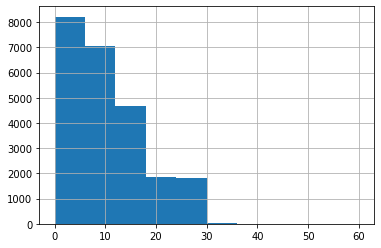

In [26]:
print(data['floors_total'].unique())
data.loc[data['floors_total'].isna(),'floors_total'] = data['floors_total'].median()
data['floors_total'].hist()
data.loc[data['floor'] > data['floors_total']]


Пропуски остались только в столбце 'days_exposition'. Это важный параметр при анализе, поэтому заполнять пропуски пустой строкой тут не лучший выход. 
Посмотрим, есть ли что-то общее между этими пропусками c картографическими.

In [27]:
data.loc[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,8.80,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,,,,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,9.01,3,False,...,9.01,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1152.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,False,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,,,,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,False,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.40,17,False,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,,,,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.30,5,False,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,,,,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,381.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,8.80,0.0,село Рождествено,,,,,,,NaN


Как мы видим, что есть строчки у которых пропуски сразу в 7 столбцах. Если на картографические столбцы можно закрыть глаза, то знать для анализа сколько дней висело объявления необходимо. Удалим строчки, где есть пропуски в 7 параметрах.

In [28]:
data = data.loc[~((data['parks_nearest']=='')&
         (data['ponds_nearest']=='')&
         (data['airports_nearest']=='')&
         (data['cityCenters_nearest']=='')&
         (data['days_exposition'].isna()))]

Сделаем сводную таблицу, где сравним какую часть составляют пропуски в столбце 'days_exposition' в  каждом населенном пункте. Для сравнения, я брала столбец 'rooms', т.к. там нет пропусков.

In [29]:
data_isna_days_exp = data.loc[data['days_exposition'].isna(), ['locality_name', 'rooms']].groupby('locality_name').count()
data_days_exp  = data.groupby('locality_name')['rooms'].count()
data_pivot_table = data_isna_days_exp.merge(data_days_exp, on = 'locality_name', how = 'inner' )
data_pivot_table['percent']=(data_pivot_table['rooms_x']/data_pivot_table['rooms_y']*100).round(1)
data_pivot_table

,rooms_x,rooms_y,percent
locality_name,,,
Зеленогорск,3,24,12.5
Колпино,30,338,8.9
Красное Село,19,177,10.7
Кронштадт,9,96,9.4
Ломоносов,19,133,14.3
Павловск,7,38,18.4
Петергоф,25,201,12.4
Пушкин,62,369,16.8
Санкт-Петербург,2039,15575,13.1


В некоторых строчка пропуски составляю 40%, 25% 16% и т.д.. Терять такой объем данных нам невыгодно. Поэтому лучше просто данную колонку не трогать.

In [30]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22792 non-null  int64  
 1   last_price            22792 non-null  float64
 2   total_area            22792 non-null  float64
 3   first_day_exposition  22792 non-null  object 
 4   rooms                 22792 non-null  int64  
 5   ceiling_height        14048 non-null  float64
 6   floors_total          22792 non-null  float64
 7   living_area           22792 non-null  float64
 8   floor                 22792 non-null  int64  
 9   is_apartment          22792 non-null  object 
 10  studio                22792 non-null  object 
 11  open_plan             22792 non-null  object 
 12  kitchen_area          22792 non-null  float64
 13  balcony               22792 non-null  float64
 14  locality_name         22792 non-null  object 
 15  airports_nearest   

In [31]:
# check
data.shape

(22792, 22)

In [32]:
data.reset_index(drop = True) #сделаем нумерацию

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,,,,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,574.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,9.5,9,False,...,9.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,234.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,48.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,False,...,6.00,0.0,Тихвин,,,,,,,413.0
22788,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,675.0,675.0,239.0
22789,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,381.0,381.0,NaN
22790,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,...,8.50,0.0,Тосно,,,,,,,45.0


**2.1 Изменение типов данных**

In [33]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22792 non-null  int64  
 1   last_price            22792 non-null  float64
 2   total_area            22792 non-null  float64
 3   first_day_exposition  22792 non-null  object 
 4   rooms                 22792 non-null  int64  
 5   ceiling_height        14048 non-null  float64
 6   floors_total          22792 non-null  float64
 7   living_area           22792 non-null  float64
 8   floor                 22792 non-null  int64  
 9   is_apartment          22792 non-null  object 
 10  studio                22792 non-null  object 
 11  open_plan             22792 non-null  object 
 12  kitchen_area          22792 non-null  float64
 13  balcony               22792 non-null  float64
 14  locality_name         22792 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,,,,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,574.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,9.5,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,234.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,48.0,48.0,121.0


Заменила типы данных в столбцах:
- 'first_day_exposition' (на дату и время)
- 'floors_total' (На целые значения)
- 'balcony'  (На целые значения)
- расстояние до центра
- расстояние до ближайшего аэропорта (на значения типа float)
- расстояние до ближайшего парка (на значения типа float)
- расстояние до ближайшего аэропорта  (на значения типа float)
- количество дней, сколько висело объяление (на значение типа float)
- высоту потолков (на значения типа float)

In [34]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'], errors = 'ignore')
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], errors = 'ignore')
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], errors = 'ignore')
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'], errors = 'ignore')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors = 'ignore')
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], errors = 'ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22792 non-null  int64         
 1   last_price            22792 non-null  float64       
 2   total_area            22792 non-null  float64       
 3   first_day_exposition  22792 non-null  datetime64[ns]
 4   rooms                 22792 non-null  int64         
 5   ceiling_height        14048 non-null  float64       
 6   floors_total          22792 non-null  int32         
 7   living_area           22792 non-null  float64       
 8   floor                 22792 non-null  int64         
 9   is_apartment          22792 non-null  object        
 10  studio                22792 non-null  object        
 11  open_plan             22792 non-null  object        
 12  kitchen_area          22792 non-null  float64       
 13  balcony         

**2.3 Удаление дубликатов**

In [35]:
print(len(data['locality_name'].unique()))
print()
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('ё','е' )
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('адоводческое некоммерческое товарищество','садовое товарищество')
data['locality_name'] = data['locality_name'].str.replace('поселок имени','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок')

print(len(data['locality_name'].unique()))
print(data['locality_name'].unique())
#проверим, есть ли дупликаты в нашем дата-фрейме
data[data.duplicated()]
#удалим их
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum() #проверка
data


329

291
['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'
 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Сиверский'
 'поселок Молодцово' 'поселок Кузьмоловский' 'Павловск'
 'деревня Пикколово' 'Всеволожск' 'Кингисепп' 'Сестрорецк'
 'деревня Куттузи' nan 'поселок Ефимовский' 'поселок Плодовое'
 'деревня Заклинье' 'поселок Торковичи' 'Красное Село' 'поселок Понтонный'
 'Сясьстрой' 'поселок Новый Свет' 'Приозерск' 'Сланцы' 'село Путилово'
 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'деревня Оржицы' 'деревня Кальтино' 'поселок Романовка' 'поселок Бугры'
 'поселок Рощино' 'Луга' 'Волосово' 'Отрадное' 'село Павлово'
 'поселок Оредеж' 'село Копорье' 'Кудрово' 'поселок Молодежное' 'Тихвин'
 'деревня Нурма' 'поселок Синявино' 'Тосно' 'поселок Стре

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,574.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,9.5,9,False,...,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,234.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,48.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22591,2,1350000.0,30.00,2017-07-07,1,NaN,5,17.5,4,False,...,6.00,0,Тихвин,NaN,NaN,,NaN,,NaN,413.0
22592,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,675.0,675.0,239.0
22593,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,381.0,381.0,NaN
22594,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,,NaN,,NaN,45.0


**2.4 Удаление выбивающихся значений**

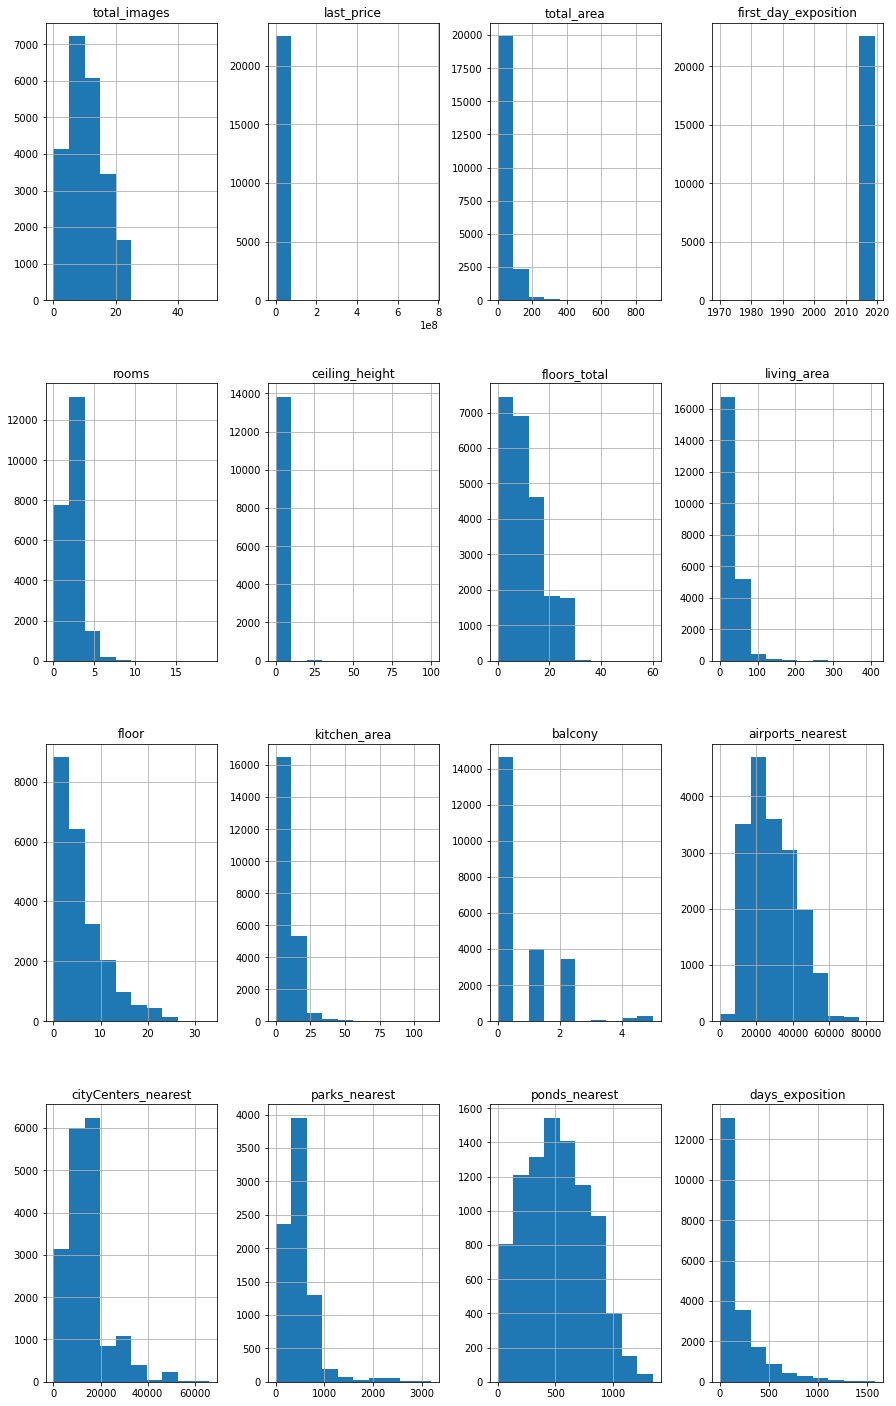

In [36]:
data.hist(figsize=(15,25));

По гистограммам мы видим, что выбросы скорее всего будут в столбцах :
- 'last_price'
- 'total_area'
- 'first_day_exposition'
- 'ceiling_height'
- 'living_area'
- kitchen_area'

Пойдем по порядку. 
Рассмотрим столбец 'total_images'

In [37]:
print(data['total_images'].unique()) #проверяем уникальные значения 
data['total_images'].value_counts()

[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]


10    1715
9     1645
20    1610
8     1495
7     1439
6     1417
11    1292
5     1234
12    1170
0     1029
13     972
14     940
4      939
15     897
1      830
3      734
16     721
17     632
2      617
18     611
19     583
23      16
21      11
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64

В основном количество фотоснимков находится в диапазоне от 0 до 30. Все, что свыше 30 - это уже выбросы. Уберём такие квартиры. 

In [38]:
data = data.loc[data['total_images'] <30]

Теперь рассмотрим столбец 'last_price'.

min            0.0
max    763000000.0
Name: last_price, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14928,20,300000000.0,618.0,2017-12-18,7,3.4,7,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,198.0,198.0,111.0
1371,19,330000000.0,190.0,2018-04-04,3,3.5,7,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,285.0,285.0,233.0
14027,15,401300000.0,401.0,2016-02-20,5,NaN,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,478.0,478.0,393.0
18633,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,318.0,318.0,106.0
12367,19,763000000.0,400.0,2017-09-30,7,NaN,10,250.0,10,False,...,20.0,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,756.0,756.0,33.0


None


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
138,0,0.0,0.0,1970-01-01,0,0.00,0,0.00,0,0,...,0.00,0,NaN,0.0,0.0,0,0.0,0,0.0,0.0
8378,7,12190.0,109.0,2019-03-20,2,2.75,25,32.00,25,False,...,40.50,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,,NaN,8.0
14227,5,430000.0,54.0,2018-06-26,2,NaN,3,8.80,3,False,...,8.80,0,поселок Свирь,NaN,NaN,,NaN,,NaN,44.0
15517,18,440000.0,40.0,2018-07-10,1,NaN,5,9.01,1,False,...,9.01,0,деревня Старополье,NaN,NaN,,NaN,,NaN,45.0
5416,7,450000.0,42.0,2017-07-31,2,NaN,1,23.00,1,False,...,5.80,0,поселок Будогощь,NaN,NaN,,NaN,,NaN,233.0


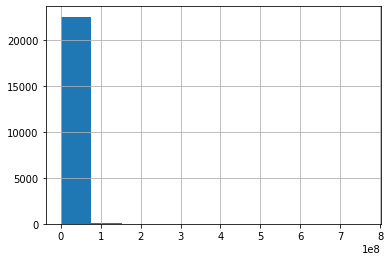

In [39]:
print(data['last_price'].agg(['min','max']))  #находим максимальные и минимальные значения
data['last_price'].hist()
data['last_price'].head(20)
len(data['last_price'])
print(display(data.sort_values(by ='last_price').tail()))
data.sort_values(by ='last_price').head()

Квартира за 763 000 000 - это по-моему чересчур. Но и за 12190 мало. 
Оставим квартиры у которых цены в диапазоне от 400 000 до 100 000 000 

In [40]:
data = data.query('400000<last_price<100000000')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,574.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,9.5,9,False,...,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,234.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,48.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22591,2,1350000.0,30.00,2017-07-07,1,NaN,5,17.5,4,False,...,6.00,0,Тихвин,NaN,NaN,,NaN,,NaN,413.0
22592,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,675.0,675.0,239.0
22593,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,381.0,381.0,NaN
22594,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,,NaN,,NaN,45.0


In [41]:
print(display(data.sort_values(by ='last_price').tail()))
data.sort_values(by ='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
472,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.0,4,False,...,77.00,0,Санкт-Петербург,21740.0,436.0,2.0,138.0,620.0,620.0,14.0
148,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.0,3,False,...,11.05,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,366.0,366.0,62.0
15816,10,98000000.0,155.0,2017-12-16,3,NaN,8,9.5,6,False,...,9.50,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,198.0,198.0,90.0
5352,14,99000000.0,280.0,2018-01-19,3,NaN,4,160.0,4,False,...,9.50,0,Санкт-Петербург,21178.0,1281.0,2.0,283.0,22.0,22.0,NaN
6302,20,99000000.0,488.0,2017-04-09,5,2.95,20,216.0,17,False,...,50.00,0,Санкт-Петербург,27641.0,4598.0,1.0,646.0,368.0,368.0,351.0


None


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14227,5,430000.0,54.0,2018-06-26,2,NaN,3,8.80,3,False,...,8.80,0,поселок Свирь,NaN,NaN,,NaN,,NaN,44.0
15517,18,440000.0,40.0,2018-07-10,1,NaN,5,9.01,1,False,...,9.01,0,деревня Старополье,NaN,NaN,,NaN,,NaN,45.0
15462,14,450000.0,38.5,2018-07-11,2,2.65,2,8.80,1,False,...,8.80,0,деревня Вахнова Кара,NaN,NaN,,NaN,,NaN,45.0
16861,0,450000.0,36.5,2018-02-01,1,NaN,5,17.30,4,False,...,8.50,1,деревня Ям-Тесово,NaN,NaN,,NaN,,NaN,120.0
5416,7,450000.0,42.0,2017-07-31,2,NaN,1,23.00,1,False,...,5.80,0,поселок Будогощь,NaN,NaN,,NaN,,NaN,233.0


Рассмотрим столбец 'rooms'

In [42]:
print(data['rooms'].value_counts())

1     7769
2     7608
3     5548
4     1129
5      307
6       99
7       53
8       10
9        8
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64


Больше 10 комнат в квартире - это уже хоромы. Таких квартир очень мало, следует их убрать из общей выборки.

In [43]:
data = data.loc[data['rooms'] < 10]

Рассмотрим столбец 'ceiling_height'. Как было уже сказано, если высота потолков больше 20м, то скорее всего человек ошибся и указал ее в см. Следовательно, стоит все значения больше 20.00 поделить на 10. 
А если значение больше 5м но до 20 - то мы их удалим. Аналогично, удалим все значения до 2м. (Таких потолков в квартире не бывает)

In [44]:
print(data['ceiling_height'].unique())
print(data['ceiling_height'].isna().sum())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.62   3.12   2.53   2.74   2.96
   2.46   5.     2.45   2.79   2.95   4.06   2.94   3.54   3.53   2.83
   2.4    3.38   3.01   5.6    3.65   3.9    3.18   3.35   2.3    3.57
   2.48   2.62   2.82   3.98   2.63   3.83   3.52   3.95   3.75   2.88
   3.67   3.87   3.66   3.86   4.19   3.24   4.8    4.2    3.36   4.5
   3.08   3.68   3.07   3.37   3.09   8.     3.16   3.26   3.34   2.81
   3.44   2.97   4.37   2.68   3.22   3.27   4.1    2.93   3.46  24.
   3.47   3.33  27.     3.63   3.14   3.32  26.     1.2    8.3    2.98
   2.86   3.17   4.4    3.28   3.04   4.45   5.5    3.84   3.23   3.02
   3.21   3.

In [45]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22531 entries, 0 to 22595
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22531 non-null  int64         
 1   last_price            22531 non-null  float64       
 2   total_area            22531 non-null  float64       
 3   first_day_exposition  22531 non-null  datetime64[ns]
 4   rooms                 22531 non-null  int64         
 5   ceiling_height        13813 non-null  float64       
 6   floors_total          22531 non-null  int32         
 7   living_area           22531 non-null  float64       
 8   floor                 22531 non-null  int64         
 9   is_apartment          22531 non-null  object        
 10  studio                22531 non-null  object        
 11  open_plan             22531 non-null  object        
 12  kitchen_area          22531 non-null  float64       
 13  balcony         

In [46]:
def method (row):
    if row >= 23.00:
        row = row/10
    return row

data = data.loc[((data['ceiling_height'] < 4.5)&(data['ceiling_height']>= 2.3 ))|(data['ceiling_height'].isna())]
data['ceiling_height'].apply(method)

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,574.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,9.5,9,False,...,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,234.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,48.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22591,2,1350000.0,30.00,2017-07-07,1,NaN,5,17.5,4,False,...,6.00,0,Тихвин,NaN,NaN,,NaN,,NaN,413.0
22592,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,675.0,675.0,239.0
22593,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,381.0,381.0,NaN
22594,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,,NaN,,NaN,45.0


In [47]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22477 entries, 0 to 22595
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22477 non-null  int64         
 1   last_price            22477 non-null  float64       
 2   total_area            22477 non-null  float64       
 3   first_day_exposition  22477 non-null  datetime64[ns]
 4   rooms                 22477 non-null  int64         
 5   ceiling_height        13759 non-null  float64       
 6   floors_total          22477 non-null  int32         
 7   living_area           22477 non-null  float64       
 8   floor                 22477 non-null  int64         
 9   is_apartment          22477 non-null  object        
 10  studio                22477 non-null  object        
 11  open_plan             22477 non-null  object        
 12  kitchen_area          22477 non-null  float64       
 13  balcony         

Рассмотрим столбец 'total_area'. Посмотрим, сколько квартир имеет площадь больше 200 м^2. 

In [48]:
data.query('total_area > 200').count()

total_images            182
last_price              182
total_area              182
first_day_exposition    182
rooms                   182
ceiling_height          114
floors_total            182
living_area             182
floor                   182
is_apartment            182
studio                  182
open_plan               182
kitchen_area            182
balcony                 182
locality_name           182
airports_nearest        178
cityCenters_nearest     180
parks_around3000        182
parks_nearest           118
ponds_around3000        182
ponds_nearest           123
days_exposition         135
dtype: int64

Эти квартиры стоит удалить, чтобы они не портили общую картину.

In [49]:
data = data.loc[data['total_area'] <= 200]

Рассмотрим столбец 'days_exposition'. По гистограмме видно, что чаще всего квартиры продавались за первые 250 дней. 
250 дней - это почти год, следовательно, это вполне нормальный срок для продажи квартир. 
Квартиры, которые продавались больше 2-х лет, т.е. более 750 дней - это скорее что-то  аномальное. Такие варианты стоит удалить.

In [50]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,574.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,9.5,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,234.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,48.0,48.0,121.0


In [51]:
data = data.loc[(data['days_exposition'] <=750)|
               (data['days_exposition']).isna()]

In [52]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,574.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,9.5,9,False,...,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,234.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,48.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22591,2,1350000.0,30.00,2017-07-07,1,NaN,5,17.5,4,False,...,6.00,0,Тихвин,NaN,NaN,,NaN,,NaN,413.0
22592,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,675.0,675.0,239.0
22593,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,381.0,381.0,NaN
22594,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,,NaN,,NaN,45.0


И последним мы рассмотрим столбец 'floors_total'

In [53]:
data['floors_total'].value_counts()

5     5118
9     3630
16    1307
12    1304
10    1077
4     1066
25    1009
6      800
17     776
3      563
7      524
14     523
18     466
24     422
15     348
8      348
23     325
19     310
2      296
22     268
20     250
13     212
11     183
27     155
21     138
26     120
35      22
1       21
28      20
36       2
34       1
60       1
29       1
33       1
52       1
Name: floors_total, dtype: int64

Домов, где больше 30 этажей очень мало. Удалим их.

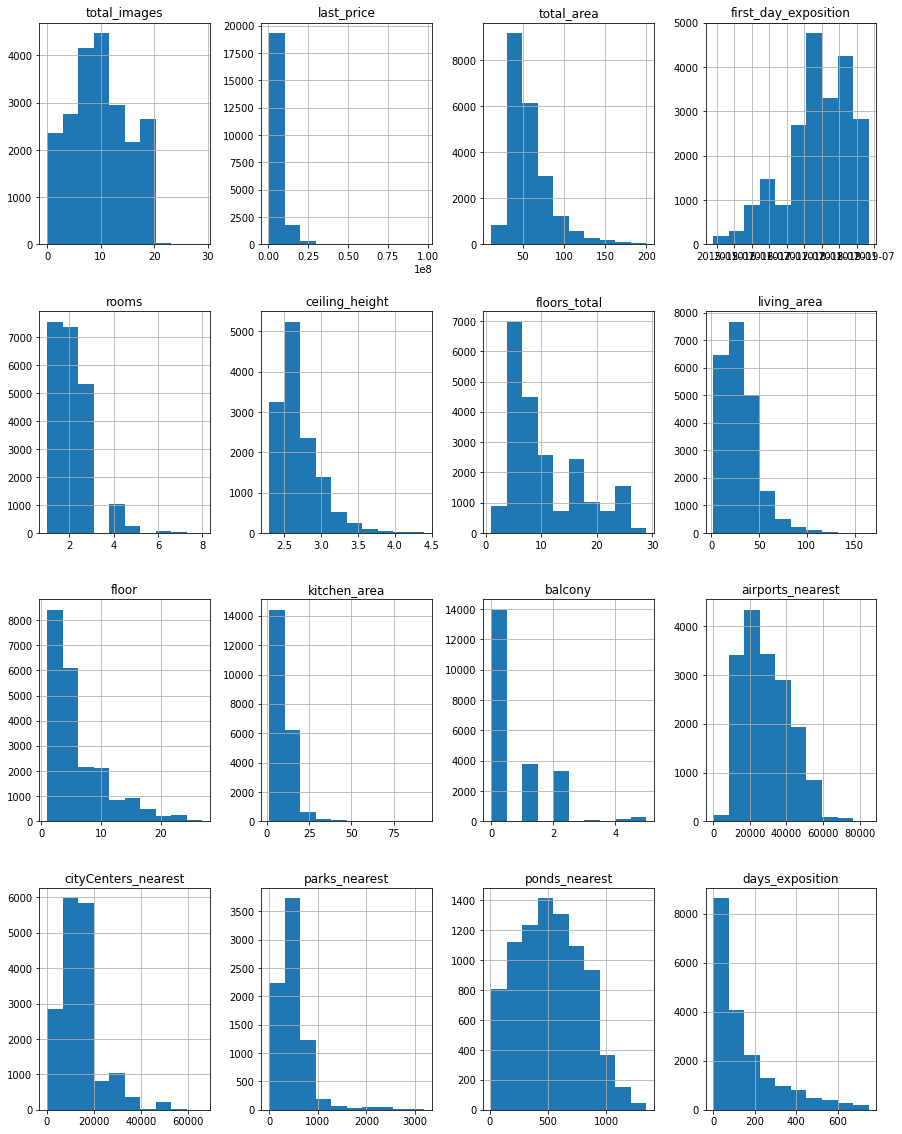

In [54]:
data = data.loc[data['floors_total']<30]
data.hist(figsize = (15,20));

In [55]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,580.00","21,580.00","13,183.00","19,341.00","21,580.00","21,580.00","21,580.00","21,580.00","21,580.00"
min,1.00,12.00,2.30,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,8.00,200.00,4.40,748.00,"98,000,000.00",164.70,93.20,27.00,29.00


In [56]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,574.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,9.5,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,234.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,48.0,48.0,121.0


Стоит проверить аномально маленькую жилплощадь.

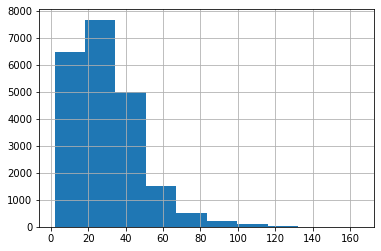

In [57]:
data['living_area'].hist();

Большинство квартир имеют жилплощадь до 100 кв.м. Следовательно, уберем остальные данные.

In [58]:
data = data.loc[data['living_area'] <= 100]

### Посчитайте и добавьте в таблицу новые столбцы

In [59]:
#цена одного квадратного метра;
data['price_one_meter'] =  data['last_price'] /data['total_area'] 
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['day_publication'] = pd.DatetimeIndex(data['first_day_exposition']).day_name()
#месяц публикации объявления;
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month
print(data['month_publication'].value_counts())
#год публикации объявления;
data['year_publication']= pd.DatetimeIndex(data['first_day_exposition']).year

2     2407
3     2230
11    2180
4     2059
10    1964
9     1800
6     1639
8     1626
7     1562
12    1445
1     1355
5     1155
Name: month_publication, dtype: int64


In [60]:
#тип этажа квартиры (значения — «‎первый», «последний», «другой»);
def type_floors (floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    elif floor['floor'] <=0:
        return 'Ошибка!'
    else:
        return 'другой'

    
data['type_floor'] = data[['floor','floors_total']].apply(type_floors, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_publication,month_publication,year_publication,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,755.0,755.0,NaN,120370.370370,Thursday,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,,NaN,81.0,82920.792079,Tuesday,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,1.0,90.0,574.0,574.0,558.0,92785.714286,Thursday,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,9.5,9,False,...,2.0,84.0,234.0,234.0,424.0,408176.100629,Friday,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,48.0,48.0,121.0,100000.000000,Tuesday,6,2018,другой


In [61]:
data['type_floor'].value_counts()

другой       15910
последний     2899
первый        2613
Name: type_floor, dtype: int64

In [62]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(0)
data[['cityCenters_nearest_km','cityCenters_nearest']].head()

,cityCenters_nearest_km,cityCenters_nearest
0,16.0,16028.0
1,19.0,18603.0
2,14.0,13933.0
3,7.0,6800.0
4,8.0,8098.0


### Проведите исследовательский анализ данных

**4.1 Изучаем параметры**

**- общая площадь**

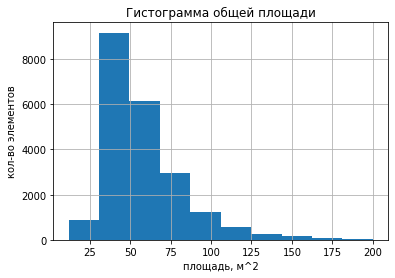

In [63]:
data['total_area'].agg(['mean','median', 'min', 'max'])
plt.title("Гистограмма общей площади") # заголовок
plt.xlabel("площадь, м^2") # ось абсцисс
plt.ylabel("кол-во элементов") # ось ординат
plt.grid()      # включение отображение сетки
plt.hist(data['total_area']);  # построение график

Общая площадь квартир лежит в диапазоне от 14 м^2 до 200 м^2. 
Больше всего квартир площадью от 28 до 50 м^2. 

**- жилая площадь**

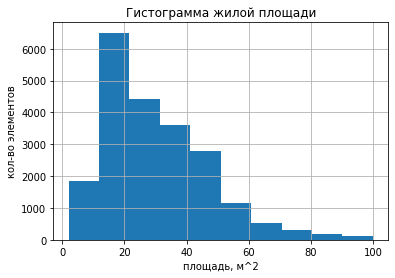

In [64]:
data['living_area'].agg(['mean','median', 'min', 'max'])
plt.title("Гистограмма жилой площади") # заголовок
plt.xlabel("площадь, м^2") # ось абсцисс
plt.ylabel("кол-во элементов") # ось ординат
plt.grid()      # включение отображение сетки
plt.hist(data['living_area']);  # построение график

Значение жилой площади в квартире начинаются от 2 до 164 кв.м. Больше всего квартир с жилой площадью от 2 до 50. 

**- площадь кухни**

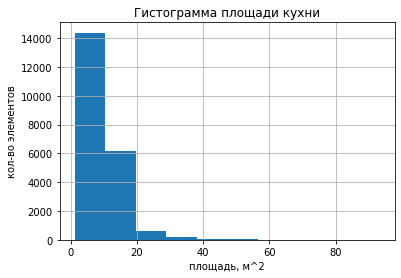

In [65]:
data['kitchen_area'].agg(['mean','median', 'min', 'max'])
plt.title("Гистограмма площади кухни") # заголовок
plt.xlabel("площадь, м^2") # ось абсцисс
plt.ylabel("кол-во элементов") # ось ординат
plt.grid()      # включение отображение сетки
plt.hist(data['kitchen_area']);  # построение график

Значение площади кухни в квартире начинаются от 1 до 93 кв.м. Больше всего квартир с площадью кухни от 1 до 10. 

**- цена объекта**

mean      5.926528e+06
median    4.650000e+06
min       4.300000e+05
max       9.800000e+07
Name: last_price, dtype: float64


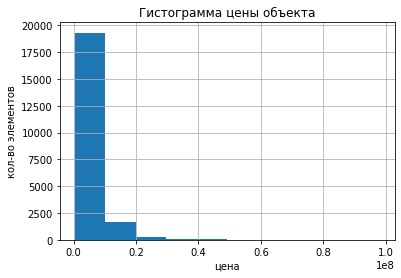

In [66]:
print(data['last_price'].agg(['mean','median', 'min', 'max']))
data.query('last_price < 10000000')

plt.title('Гистограмма цены объекта')
plt.xlabel("цена") # ось абсцисс
plt.ylabel("кол-во элементов") # ось ординат
plt.grid()      # включение отображение сетки
plt.hist(data['last_price']);

In [67]:
data.loc[(data['last_price']>10000000)&(data['total_area']>125),
         ['last_price','rooms','living_area', 'total_area','kitchen_area']].sort_values(by = 'last_price').tail(10)

,last_price,rooms,living_area,total_area,kitchen_area
10810,72375000.0,4,95.40,169.3,22.50
13828,77000000.0,3,59.70,186.0,39.10
14996,77349000.0,3,9.50,135.7,9.50
4975,77612080.0,2,82.00,152.3,11.00
6486,79000000.0,6,90.00,163.0,28.00
15482,82400000.0,3,58.20,181.1,93.20
9880,83820000.0,3,82.00,153.0,11.00
10898,85000000.0,3,87.23,145.7,20.31
11491,86738800.0,5,89.70,190.0,25.86
15816,98000000.0,3,9.50,155.0,9.50


мы видим, что высокая цена, как правило, требуется за большую общую площадь квартиры.

**- количество комнат**

1    7554
2    7358
3    5303
4     992
5     184
6      25
7       6
Name: rooms, dtype: int64


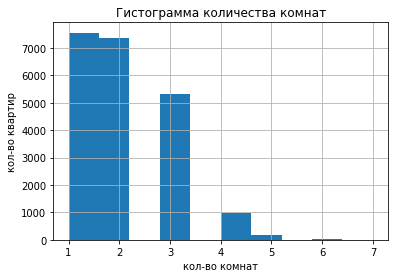

In [68]:
print(data['rooms'].value_counts())
data['rooms'].agg(['mean','median', 'min', 'max'])
plt.title('Гистограмма количества комнат')
plt.xlabel("кол-во комнат") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid()      # включение отображение сетки
plt.hist(data['rooms']);

Как мы видим, большинство квартир имеет 1-3 комнаты. 

**- высота потолков**

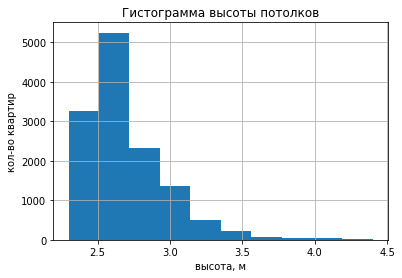

In [69]:
data['ceiling_height'].agg(['mean','median', 'min', 'max'])
plt.title('Гистограмма высоты потолков')
plt.xlabel("высота, м") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid()      # включение отображение сетки
plt.hist(data['ceiling_height']);

Большиство квартир имеею высоту потолков от 2,6 до 2,8 м.

**- этаж квартиры**

2     2959
3     2762
1     2613
4     2498
5     2340
6     1190
7     1110
8     1023
9      997
10     634
12     492
11     485
13     354
15     318
14     314
16     292
17     207
18     163
19     136
21     115
22     104
20     102
23      92
24      55
25      38
26      21
27       8
Name: floor, dtype: int64


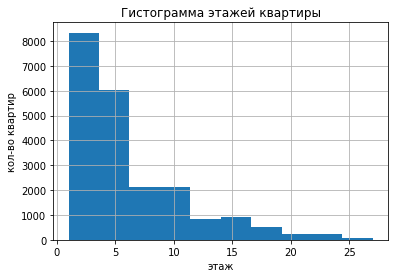

In [70]:
print(data['floor'].value_counts())
data['floor'].agg(['mean','median', 'min', 'max'])
plt.title('Гистограмма этажей квартиры')
plt.xlabel("этаж") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid()      # включение отображение сетки
plt.hist(data['floor']);

Большинство квартир находится на 1-6 этаже.

**- тип этажа квартиры («первый», «последний», «другой»);**

другой       15910
последний     2899
первый        2613
Name: type_floor, dtype: int64


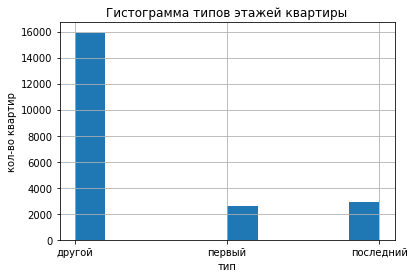

In [71]:
print(data['type_floor'].value_counts())
plt.title('Гистограмма типов этажей квартиры')
plt.xlabel("тип") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid()      # включение отображение сетки
plt.hist(data['type_floor']);

На первом и последнем этаже меньше всего квартир. 

**- общее количество этажей в доме;**


5     5068
9     3627
12    1300
16    1300
10    1075
4     1049
25    1008
17     775
6      770
3      560
14     522
7      506
18     465
24     422
15     345
8      341
23     324
19     309
2      293
22     268
20     249
13     208
11     183
27     155
21     138
26     120
1       21
28      20
29       1
Name: floors_total, dtype: int64


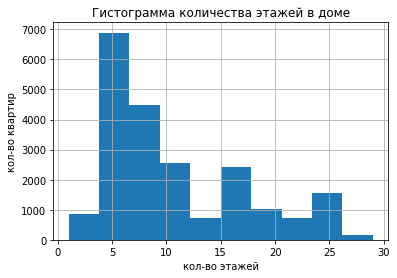

In [72]:
print(data['floors_total'].value_counts())
data['floors_total'].agg(['mean','median', 'min', 'max'])
plt.title('Гистограмма количества этажей в доме')
plt.xlabel("кол-во этажей") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid()      # включение отображение сетки
plt.hist(data['floors_total']);

Больше всего 5-этажек и 9-этажек. 
Также часто встречаются: 4, 10, 12, 16, 25 -этажки.
В целом, это очень похоже Санкт-Петербург.

**- расстояние до центра города в метрах;**

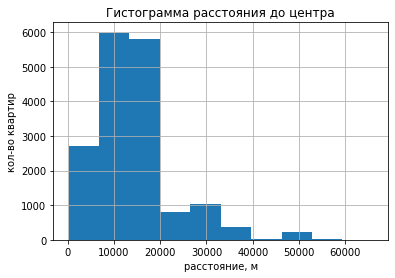

In [73]:
data['cityCenters_nearest'].agg(['mean','median', 'min', 'max'])
plt.title('Гистограмма расстояния до центра')
plt.xlabel("расстояние, м") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid(True)      # включение отображение сетки
plt.hist(data['cityCenters_nearest']);

Как правило, чаще продаются квартиры у которых до центра до 20000м, т.е. до 20 км.

**- расстояние до ближайшего аэропорта**

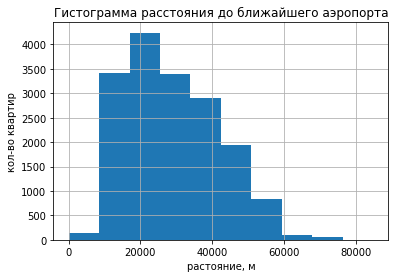

In [74]:
data['airports_nearest'].agg(['mean','median', 'min', 'max'])
plt.title('Гистограмма расстояния до ближайшего аэропорта')
plt.xlabel("растояние, м") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid(True)      # включение отображение сетки
plt.hist(data['airports_nearest']);

Как правило, большинству добираться до аэропорта от 10 км до 30 км. Это нормальные показатели для расстояния до аэропорта. 

**- расстояние до ближайшего парка;**

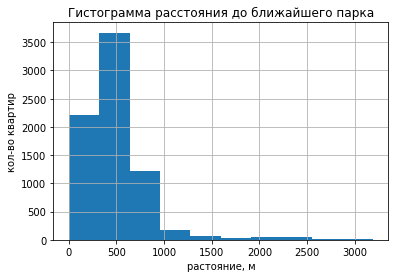

In [75]:
data['parks_nearest'].agg(['mean','median', 'min', 'max'])
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel("растояние, м") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid(True)      # включение отображение сетки
plt.hist(data['parks_nearest']);

До парка в среднем от квартир меньше 1 км. Это очень хороший показатель.

**- день и месяц публикации объявления.**

Thursday     3841
Tuesday      3788
Friday       3660
Wednesday    3562
Monday       3274
Saturday     1755
Sunday       1542
Name: day_publication, dtype: int64


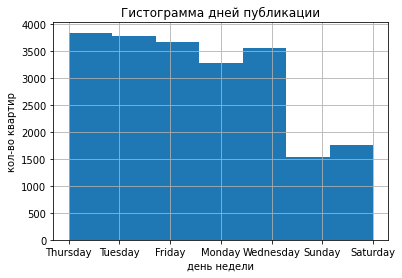

In [76]:
print(data['day_publication'].value_counts())
plt.title('Гистограмма дней публикации')
plt.xlabel("день недели") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid(True)      # включение отображение сетки
plt.hist(data['day_publication'], bins = 7);

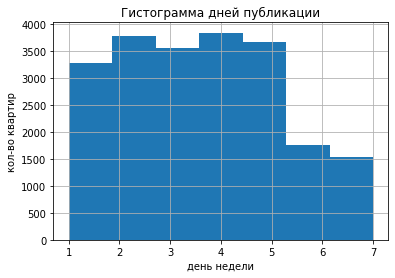

In [77]:
#сделаем цифровую кодировку категориальных данных
month = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in range(len(month)):   
    data.loc[data['day_publication'] == month[i], 'day_publication'] = i+1
    
plt.title('Гистограмма дней публикации')
plt.xlabel("день недели") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid(True)      # включение отображение сетки
plt.hist(data['day_publication'],bins = 7);
   

Как правило, чаще всего выкладывают объявления в начале недели, а реже всего в конце.

2     2407
3     2230
11    2180
4     2059
10    1964
9     1800
6     1639
8     1626
7     1562
12    1445
1     1355
5     1155
Name: month_publication, dtype: int64


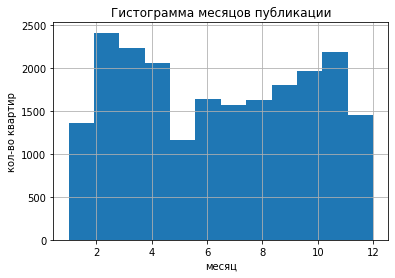

In [78]:

print(data['month_publication'].value_counts())
data['month_publication'].agg(['mean','median', 'min', 'max'])
plt.title('Гистограмма месяцов публикации')
plt.xlabel("месяц") # ось абсцисс
plt.ylabel("кол-во квартир") # ось ординат
plt.grid(True)      # включение отображение сетки
data['month_publication'].hist( bins = 12);

Объявления чаще выкладывают в конце зимы и начало весны.

***Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?***

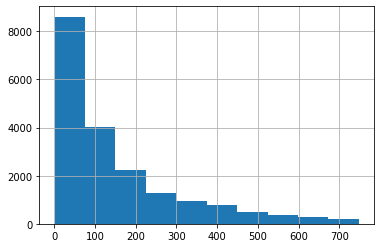

In [79]:
data['days_exposition'].hist();

По гистограмме видно, что чаще всего квартиры продавались около 170 дней. (т.е. за полгода)

In [80]:
data['days_exposition'].agg(['mean', 'median'])

mean      151.321963
median     90.000000
Name: days_exposition, dtype: float64

В среднем нам показывается, что квартира продавалась за 90 дней.
Создадим новый столбец, где будет классификация по столбцу 'days_exposition'
- Неизвестно (объявление висело 0 дней)
- Очень быстро (Объявление висело 1-30 дней)
- Довольно быстро (Объявление висело 31-90 дней)
- Средне (Объявление висело 91-180 дней)
- Медленно (Объявление висело 181-365 дней)
- Очень медленно (Объявление висело больше, чем 365 дней)


In [81]:
def type_days_exp(row):
    if row == 0:
        return 'Неизвестно'
    elif 1<=row<=30:
        return 'Очень быстро'
    elif 31<=row<=90:
        return 'Довольно быстро'
    elif 91<=row<=180:
        return 'Средне'
    elif 181<=row<=365:
        return 'Медленно'
    else :
        return 'Очень медленно'

data['days_exposition_type']=data['days_exposition'].apply(type_days_exp)

In [82]:
data['days_exposition_type'].value_counts()

Довольно быстро    5854
Очень медленно     4669
Средне             3983
Очень быстро       3627
Медленно           3289
Name: days_exposition_type, dtype: int64

Мы видим, что большинство квартир продавались в первый месяц. 

**4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?**
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

**- Влияние общей площади на стоимость**

Коээфицент корреляции Пирсона: 0.73


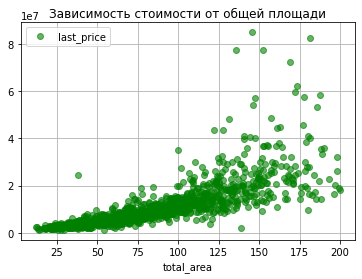

In [83]:
data.pivot_table(index='total_area', values='last_price').plot(style ='o',alpha =0.6, color = 'green', grid = 'True');
plt.title('Зависимость стоимости от общей площади');
#Рассчет коэффициента корреляции Пирсона
print('Коээфицент корреляции Пирсона: {0}'.format((data['last_price'].corr(data['total_area'])).round(2)))

Коэффициент Пирсона равен 0.7 - это значит, что общая площадь жилья оказывает влияние на его стоимость. Чем больше площадь, тем больше стоимость. 

Есть различные выбросы, но их не так много. В целом суть графика совпадает со здравом смыслом.

**- Влияние жилой площади на стоимость**

Коээфицент корреляции Пирсона: 0.51


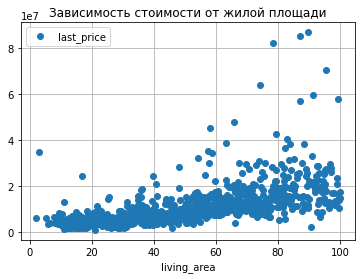

In [84]:
data.pivot_table(index='living_area', values='last_price').plot(style = 'o', grid = True);
plt.title('Зависимость стоимости от жилой площади');
print('Коээфицент корреляции Пирсона: {0}'.format((data['last_price'].corr(data['living_area'])).round(2)))

Тут влияние есть, но уже не такое сильное, как у общей площади. Выбросы также присутствуют. 

**- Влияние площади кухни на стоимость**

Коээфицент корреляции Пирсона: 0.54


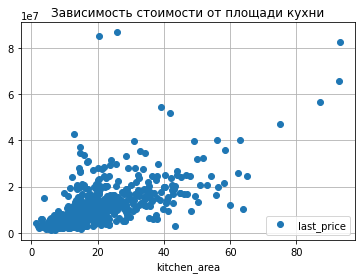

In [85]:
data.pivot_table(index='kitchen_area', values='last_price').plot(style = 'o', grid = True);
plt.title('Зависимость стоимости от площади кухни');
print('Коээфицент корреляции Пирсона: {0}'.format((data['last_price'].corr(data['kitchen_area'])).round(2)))

Влияние площади кухни на стоимость также есть. Оно примерно такое же, как и влияние жилой площади на стоимость.

**- Влияние количества комнат на стоимость**

Коээфицент корреляции Пирсона: 0.42


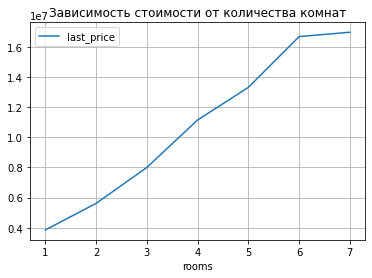

In [86]:
data.pivot_table(index='rooms', values='last_price').plot(style = '-', grid = True)
plt.title('Зависимость стоимости от количества комнат');
print('Коээфицент корреляции Пирсона: {0}'.format((data['last_price'].corr(data['rooms'])).round(2)))

Коэффициент корреляции равен 0,42. Это значит, что влияние есть: чем больше комнат, тем больше стоиость. Но это влияние не такое сильное, как влияние площадей на стоимость. 

**- Влияние этажа, на котором расположена квартира (первый, последний, другой); на стоимость**

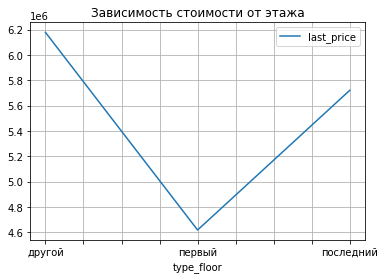

In [87]:
data.pivot_table(index='type_floor', values='last_price').plot(style = '-', grid = True)
plt.title('Зависимость стоимости от этажа');

Если квартира находиться на 1 этаже, то стоимость у нее будет явно ниже, чем на каком-либо другом. Последний этаж тоже не сильно ценится, квартиры на нем стоят больше, чем на 1, но не так много, как на остальных. 

**- Влияние даты размещения (день недели, месяц, год). на стоимость**

In [88]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_one_meter',
       'day_publication', 'month_publication', 'year_publication',
       'type_floor', 'cityCenters_nearest_km', 'days_exposition_type'],
      dtype='object')

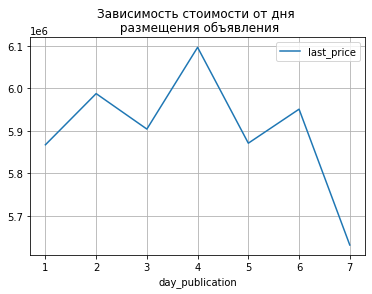

In [89]:
data.pivot_table(index='day_publication', values='last_price').plot(style = '-', grid = True);
plt.title('Зависимость стоимости от дня \n размещения объявления');


Если рассматривать только дни недели, то объявление размещенное в пятницу и вторник были более дорогие, чем остальные. Объявления квартир, которые были размещены были в воскресенья - самые дешевые. 
Но думаю, что учитывать только день недели неправильно. В конце попробуем учесть всю дату сразу.

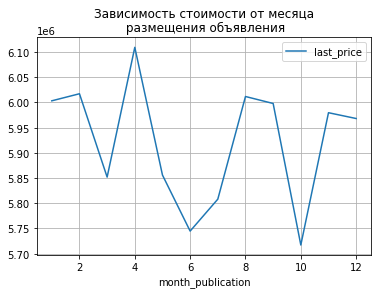

In [90]:
data.pivot_table(index='month_publication', values='last_price').plot(style = '-', grid = True);
plt.title('Зависимость стоимости от месяца\n размещения объявления');

По графику более дорогие обявления выкладывались в 4 и 2 месяц, а более дешевые в 3 и 10. 

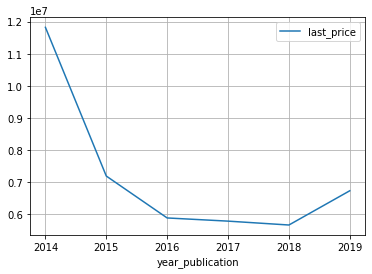

In [91]:
data.pivot_table(index='year_publication', values='last_price').plot(style = '-', grid = True);

Стоимость квартир с каждым годом падала. Это довольно странно, но по нашим данным выходит именно так.

Попробуем построить графики для всех дат:

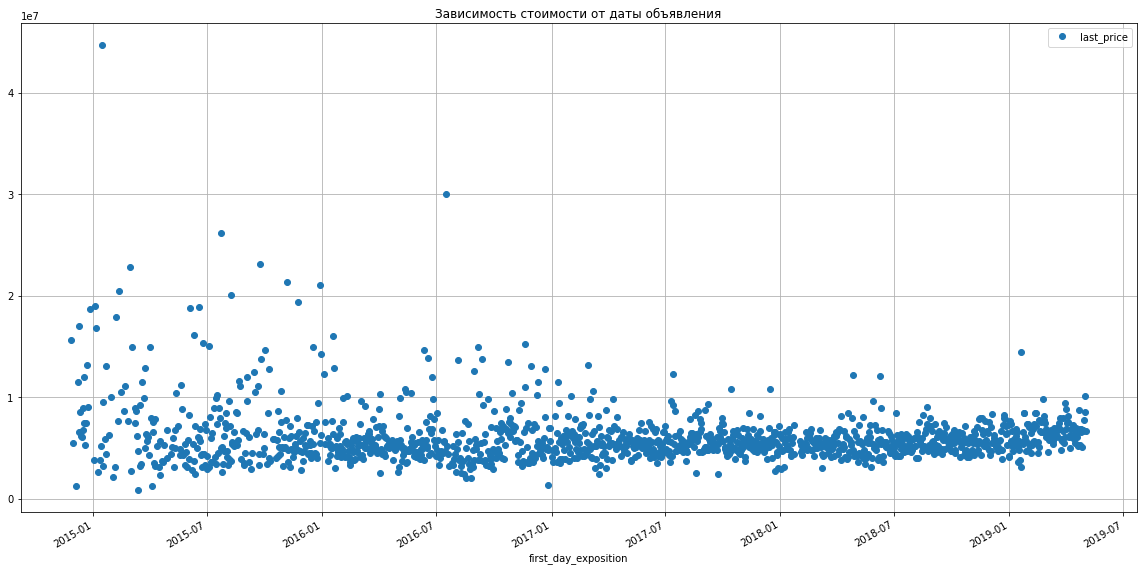

In [92]:
data.pivot_table(index='first_day_exposition', values='last_price').plot(style = 'o', grid = True, figsize=(20, 10));
plt.title('Зависимость стоимости от даты объявления');

Если смотреть по этому графику, то день, когда было выставлено объявлении не  оказывает сильного влияния на стоимость квартиры. Видно, что в начале стоимость некоторых квартир была явно выше, чем стоимость квартир в 2018-2019 годах. Это показывает то, что стоимость устаканилась. 

**4.4  Задание**
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [93]:
#Отберем 10 населенных пунктов с наибольшим числом объявлений
name_data_max_ads = pd.DataFrame(data.groupby('locality_name').count().sort_values(by='rooms', ascending=False).head(10)['price_one_meter'])
#Объединим предыдущую таблицу с нашим датафреймом. Таким образом мы получим общую таблицу, где будет всего 10 населенных пунктов
#По ним мы уже сможем посчитать среднню цену одного квадратного метра
data_average_price = name_data_max_ads.merge(data, on = 'locality_name', how ='inner')
print('Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:')
data_average_price = (pd.DataFrame(data_average_price.groupby('locality_name')['price_one_meter_y'].mean())).round(2)
data_average_price 

Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:


,price_one_meter_y
locality_name,
Всеволожск,68668.25
Выборг,57234.48
Гатчина,68091.30
Колпино,75265.08
Пушкин,102885.99
Санкт-Петербург,112537.56
деревня Кудрово,92433.27
поселок Мурино,85250.58
поселок Парголово,90302.19


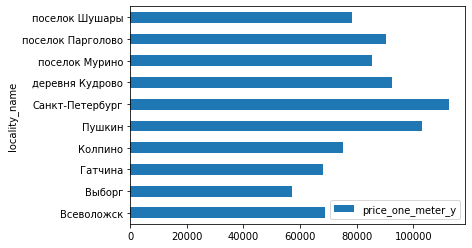

In [94]:
data_average_price.plot(kind = 'barh');

In [95]:
print(f'Населенный пункт с самой высокой стоимостью квадратного метра (из 10 выше):\n {data_average_price.idxmax()}');

Населенный пункт с самой высокой стоимостью квадратного метра (из 10 выше):
 price_one_meter_y    Санкт-Петербург
dtype: object


In [96]:
print(f'Населенный пункт с самой низкой стоимостью квадратного метра (из 10 выше):\n {data_average_price.idxmin()}');

Населенный пункт с самой низкой стоимостью квадратного метра (из 10 выше):
 price_one_meter_y    Выборг
dtype: object


**4.5 Задание**
Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [97]:
data.loc[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_km')['price_one_meter'].mean()

cityCenters_nearest_km
0.0     214172.769149
1.0     148902.437596
2.0     148291.320170
3.0     121792.603960
4.0     128731.203745
5.0     137187.777711
6.0     144099.642903
7.0     151291.360736
8.0     123595.848569
9.0     113423.159720
10.0    112582.550451
11.0    108265.040732
12.0    107574.511355
13.0    108025.406001
14.0    104139.004215
15.0    104214.448064
16.0    100293.046877
17.0     96781.654688
18.0     96797.429141
19.0     98861.627022
20.0     87214.901385
21.0     94313.850225
22.0     91333.098097
23.0     92198.935561
24.0     84962.459210
25.0     91531.371618
26.0     89285.876593
27.0    132115.709459
28.0     81161.915320
29.0     71565.976376
Name: price_one_meter, dtype: float64

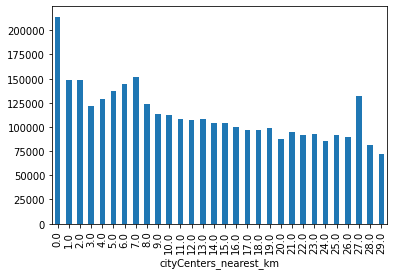

In [98]:
(data.loc[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_km')['price_one_meter'].mean()).plot(kind = 'bar');

Мы видим, что, как правило, чем ближе квартира находится к центру, тем больше ее стоимость.

### Общий вывод

После анализа данных мы выяснили, что влияет стоимость квартиры:
- общая площадь, жилая площадь и площадь кухни (чем выше площадь, тем больше стоимость)
- количество комнат (чем больше комнат, тем больше стоимость)
- этаж (если квартира находится на 1 или последней этаже, то ее стоимость будет ниже, чем у квартиры на любом другом этаже)
Также немного оказывает влияние дата размещения. В 2015 году квартиры стоили дороже, чем в 2018-2019.
В Санкт-Петербурге на стоимость квартиры влияет также ее расстояние до центра города. 

Как правило, большинство квартир продавались в первый месяц. Но были и квартиры, которые продавались больше года. 